Text(0.5, 1.0, 'Jump Diffusion Process')

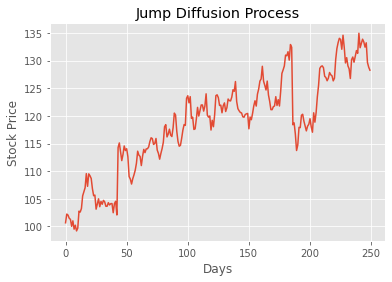

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

def merton_jump_paths(S, T, r, sigma,  lam, m, v, steps, Npaths):
    size=(steps, Npaths)
    dt = T/steps 
    poi_rv = np.multiply(np.random.poisson(lam*dt,size=size),
                         np.random.normal(m,v,size=size)).cumsum(axis=0)
    geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)
    
    return np.exp(geo+poi_rv)*S


S = 100 # current stock price
T = 1 # time to maturity
r = 0.02 # risk free rate
m = 0 # mean of jump size
v = 0.3 # standard deviation of jump
lam = 3 # intensity of jump i.e. number of jumps per annum
steps = 250 # time steps
Npaths = 1 # number of paths to simulate
sigma = 0.2 # annaul standard deviation , for weiner process

j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)

plt.plot(j)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')